# DenseNet on Cifar

This is LeNet (6c-16c-120-84) on Cifar10. Adam algorithm (lr=0.001) with 100 epoches.


#### DenseNet

    Total params: 2,746
    Trainable params: 2,618
    Non-trainable params: 128


####  DenseNet with 10 intrinsic dim

    Total params: 28,936
    Trainable params: 10
    Non-trainable params: 28,926
    
#### DenseNet with 10000 intrinsic dim    
    Total params: 26,192,746
    Trainable params: 10,000
    Non-trainable params: 26,182,746


#### DenseNet with 15000 intrinsic dim    
    Total params: 39,287,746
    Trainable params: 15,000
    Non-trainable params: 39,272,746

In [1]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline

In [26]:
def extract_num(lines0):

    valid_loss_str     = lines0[-5]
    valid_accuracy_str = lines0[-6]
    train_loss_str     = lines0[-8]
    train_accuracy_str = lines0[-9]
    run_time_str       = lines0[-10]


    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

In [27]:
def extract_num_dir(lines0):

    valid_loss_str     = lines0[-5]
    valid_accuracy_str = lines0[-6]
    train_loss_str     = lines0[-8]
    train_accuracy_str = lines0[-9]
    run_time_str       = lines0[-11]


    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

In [28]:
results_dir = '../results/dense_1_cifar'

dim = [10,50,100,500,1000,2000,5000,10000,15000]
i = 0        

# filename list of diary
diary_names = []
for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if file == 'diary':
            fname = os.path.join(subdir, file)
            diary_names.append(fname)
  
diary_names_ordered = []
for d in dim:
    for f in diary_names:
        if '_'+str(d)+'/' in f:
            # print "%d is in" % d + f
            diary_names_ordered.append(f)
        if '_dir/' in f:
            diary_names_dir = f            
 

# print diary_names_ordered

# extrinsic update  method
with open(diary_names_dir,'r') as ff:
    lines0 = ff.readlines()
    R_dir = extract_num_dir(lines0)


print "Baseline LeNet:\n" + str(R_dir) + "\n"


# intrinsic update method
Rs = []
i = 0
for fname in diary_names_ordered:
    with open(fname,'r') as ff:
        lines0 = ff.readlines()
        R = extract_num(lines0)
        print "%d dim:\n"%dim[i] + str(R) + "\n"
        i += 1

        Rs.append(R)
                            
Rs = np.array(Rs)




Baseline LeNet:
(1.93446, 0.5239, 1.92355, 0.5342, 4657.53)

10 dim:
(2.26903, 0.1742, 2.27125, 0.16984, 4650.38)

50 dim:
(2.20833, 0.2519, 2.2131, 0.24966, 4637.73)

100 dim:
(2.18982, 0.271, 2.19555, 0.26228, 4628.79)

500 dim:
(2.11538, 0.3401, 2.12425, 0.3326, 4614.07)

1000 dim:
(2.11856, 0.3372, 2.12425, 0.33204, 4617.5)

2000 dim:
(2.06223, 0.3971, 2.06798, 0.39108, 4616.81)

5000 dim:
(2.03031, 0.4289, 2.03121, 0.42948, 4650.37)

10000 dim:
(2.00616, 0.453, 2.00758, 0.45162, 4688.34)

15000 dim:
(2.02098, 0.4342, 2.00942, 0.44756, 4676.49)



## Performance comparison with Baseline

"Baseline method" indicates optimization in the parameter space.

The proposed method first embeds parameters into the intrinisic space (via orthogonal matrix), and optimization is the new space.

The dimension of intrinsic space indicates the degree of freedom in the weights of neural nets.

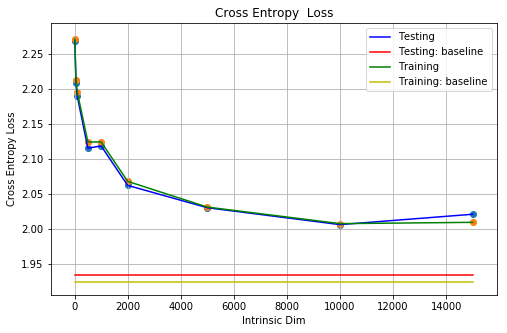

In [29]:
N = len(dim)
fig, ax = subplots(1)
ax.plot(dim, Rs[:,0],'b-', label="Testing")
ax.plot(dim, R_dir[0]*np.ones(N),'r-', label="Testing: baseline")
ax.plot(dim, Rs[:,2],'g-', label="Training")
ax.plot(dim, R_dir[2]*np.ones(N),'y-', label="Training: baseline")

ax.scatter(dim, Rs[:,0])
ax.scatter(dim, Rs[:,2])


ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss')
ax.set_title('Cross Entropy  Loss')
ax.legend()
ax.grid()
# ax.set_ylim([-0.1,3.1])
fig.set_size_inches(8, 5)

The above figure show that updating in the intrinsic space can prevent overfitting.


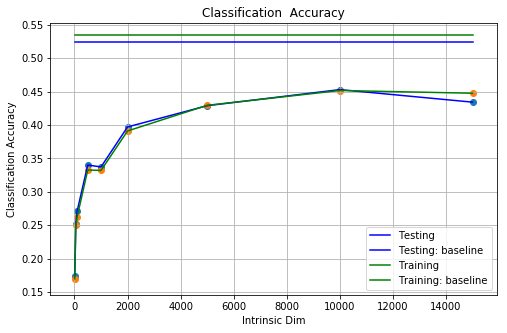

In [30]:
fig, ax = subplots(1)
ax.plot(dim, Rs[:,1],'b-', label="Testing")
ax.plot(dim, R_dir[1]*np.ones(N),'b-', label="Testing: baseline")
ax.plot(dim, Rs[:,3],'g-', label="Training")
ax.plot(dim, R_dir[3]*np.ones(N),'g-', label="Training: baseline")
ax.scatter(dim, Rs[:,1])
ax.scatter(dim, Rs[:,3])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Classification Accuracy')
ax.set_title('Classification  Accuracy')
ax.legend()
ax.grid()
# ax.set_ylim([0.75,1.01])
fig.set_size_inches(8, 5)

The above figure show that updating in the intrinsic space can prevent overfitting.

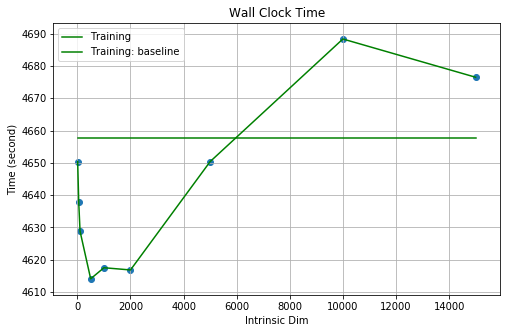

In [32]:
fig, ax = subplots(1)
ax.plot(dim, Rs[:,4],'g-', label="Training")
ax.plot(dim, R_dir[4]*np.ones(N),'g-', label="Training: baseline")
ax.scatter(dim, Rs[:,4])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Time (second)')
ax.set_title('Wall Clock Time')
ax.legend()
ax.grid()
# ax.set_ylim([0.75,100.01])
fig.set_size_inches(8, 5)